# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))

In [ ]:
df=data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# returns the first 5 rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.500,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,4.308,4.715
1,Honor,Android,17.300,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,5.162,5.519
2,Honor,Android,16.690,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,5.111,5.885
3,Honor,Android,25.500,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,5.135,5.631
4,Honor,Android,15.320,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,4.390,4.948


In [ ]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 3454 rows and 15 columns.


Observation:

* The DataFrame contains 3,454 rows and 15 columns

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observation:
* The DataFrame has 11 numerical data and 4 categerical data



In [ ]:

# Checking the statistical summary of the data, "include='all'" will bring in also categorical columns and ".T" will change colums to rows and rows to columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.000,NaN,NaN,NaN,13.713,3.805,5.080,12.700,12.830,15.340,30.710
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.000,NaN,NaN,NaN,9.460,4.815,0.080,5.000,8.000,13.000,48.000
selfie_camera_mp,3452.000,NaN,NaN,NaN,6.554,6.970,0.000,2.000,5.000,8.000,32.000
int_memory,3450.000,NaN,NaN,NaN,54.573,84.972,0.010,16.000,32.000,64.000,1024.000
ram,3450.000,NaN,NaN,NaN,4.036,1.365,0.020,4.000,4.000,4.000,12.000
battery,3448.000,NaN,NaN,NaN,3133.403,1299.683,500.000,2100.000,3000.000,4000.000,9720.000


Observation:

* We have 34 brand name and "Other" has the highest frequency
* We have 4 operation system and "Android" has the highest frequency
* 75% of phones have 15.34 cm or less as screen size
* There are missing values in the selfie_camera_mp
* 75 % of phones have battery capacity of 4,000 mAh or less
* 75% of phones weigh 185 grams or less
* The oldest phone was released in 2013 and the newest in 2020
* The shortest used days is 91 days and the longest is 1,094 days
* Normalized used price is slightly left skewed
* Normalized new price is slightly left skewed

In [ ]:
# replacing '0' with NAN
df['selfie_camera_mp'] = df['selfie_camera_mp'].replace(0,np.nan)

# changing the data type to float
df['selfie_camera_mp'] = df['selfie_camera_mp'].astype(float)

In [ ]:
# Checking if there are duplicate rows
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

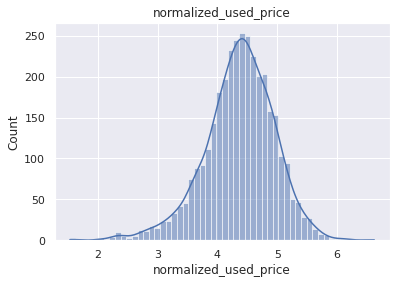

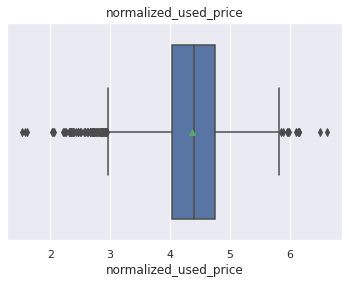

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='normalized_used_price',kde=True)
plt.title('normalized_used_price')
plt.show()
sns.boxplot(data=df,x='normalized_used_price',showmeans=True)
plt.title('normalized_used_price')
plt.show()

Observation:

* The distribution slightly left skewed
* There are outliers
* 25% of devises cost 4 or less

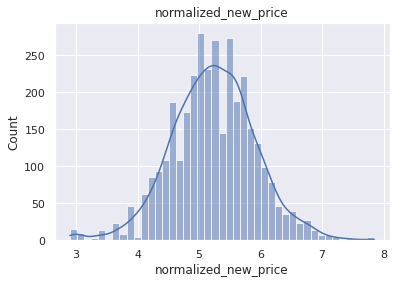

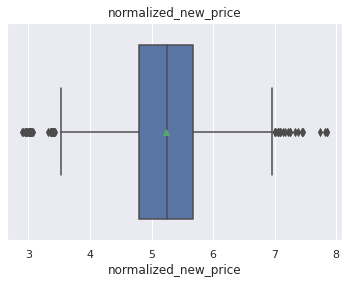

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='normalized_new_price',kde=True)
plt.title('normalized_new_price')
plt.show()
sns.boxplot(data=df,x='normalized_new_price',showmeans=True)
plt.title('normalized_new_price')
plt.show()

Observation:

* The distribution slightly left skewed
* There are outliers
* 75% of devises cost 4.6 and less

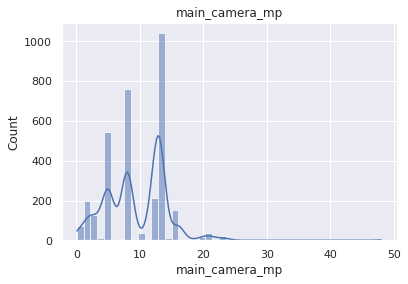

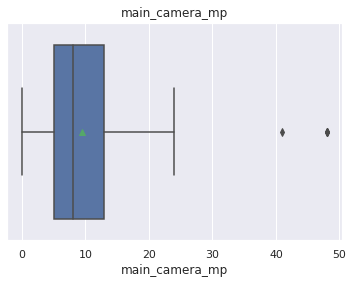

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='main_camera_mp',kde=True)
plt.title('main_camera_mp')
plt.show()
sns.boxplot(data=df,x='main_camera_mp',showmeans=True)
plt.title('main_camera_mp')
plt.show()


Observation"

* The distribution is right skewed
* There are outliers in the upper side
* 75% of devises have 12 mp on the main camera

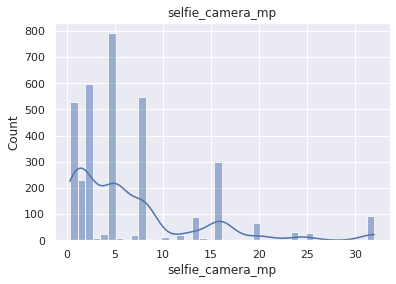

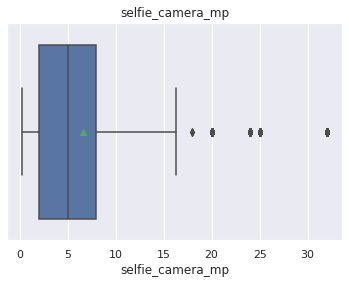

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='selfie_camera_mp',kde=True)
plt.title('selfie_camera_mp')
plt.show()
sns.boxplot(data=df,x='selfie_camera_mp',showmeans=True)
plt.title('selfie_camera_mp')
plt.show()


Observation:

* The distribution is random
* There are outliers in the upper side
* 75% of devises have  around 8 mp on the selfie camera

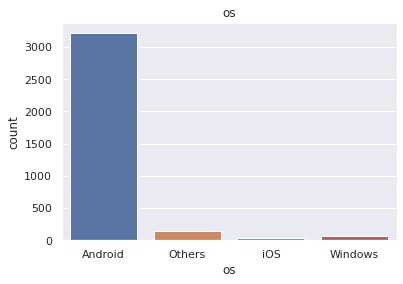

In [ ]:
# Displaying countplot
sns.countplot(data=df,x='os')
plt.title('os')
plt.show()

Observation:

* 93% of phones have Android as Operating system

In [ ]:
# Checking the percentage of each value in the "brand_name" column
df['brand_name'].value_counts(1)

Others       0.145
Samsung      0.099
Huawei       0.073
LG           0.058
Lenovo       0.050
ZTE          0.041
Xiaomi       0.038
Oppo         0.037
Asus         0.035
Alcatel      0.035
Micromax     0.034
Vivo         0.034
Honor        0.034
HTC          0.032
Nokia        0.031
Motorola     0.031
Sony         0.025
Meizu        0.018
Gionee       0.016
Acer         0.015
XOLO         0.014
Panasonic    0.014
Realme       0.012
Apple        0.011
Lava         0.010
Celkon       0.010
Spice        0.009
Karbonn      0.008
Coolpad      0.006
BlackBerry   0.006
Microsoft    0.006
OnePlus      0.006
Google       0.004
Infinix      0.003
Name: brand_name, dtype: float64

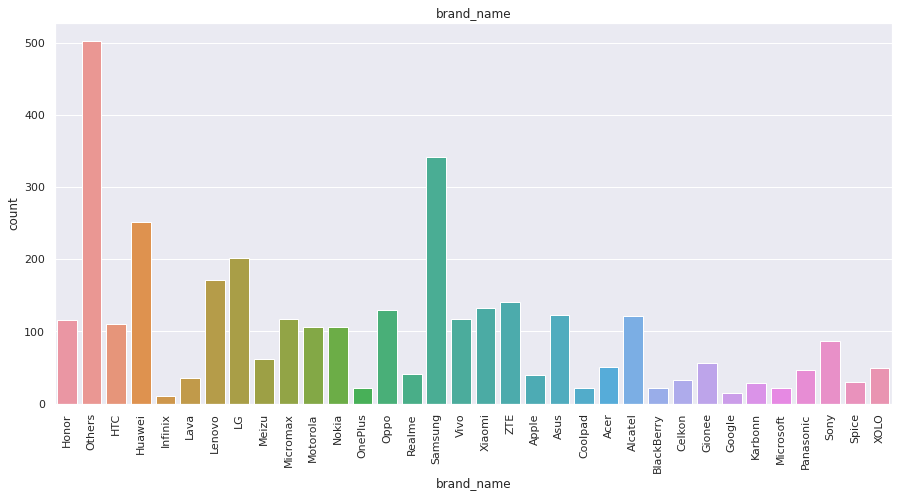

In [ ]:
# Displaying countplot
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='brand_name')
plt.xticks(rotation=90)
plt.title('brand_name')
plt.show()

Observation:

* "Other" is the most popular phone with around 14.5% followed by "Samsung" with 9.9% and Huawei with 7.3%

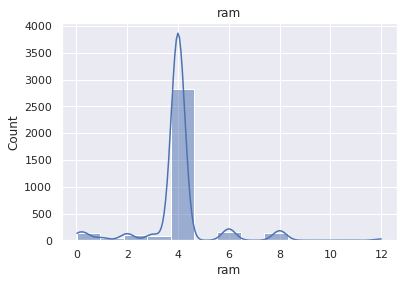

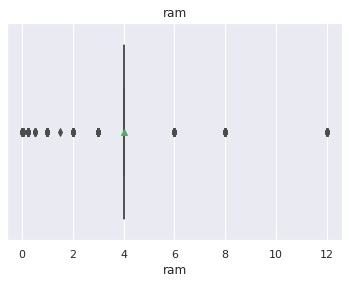

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='ram',kde=True)
plt.title('ram')
plt.show()
sns.boxplot(data=df,x='ram',showmeans=True)
plt.title('ram')
plt.show()

Observation:

* There is zero skewness or symmetric distribution
* There are outliers
* 50% of devises have 4GB ram 

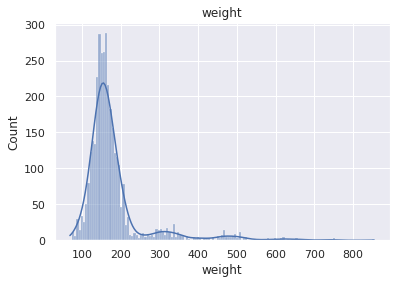

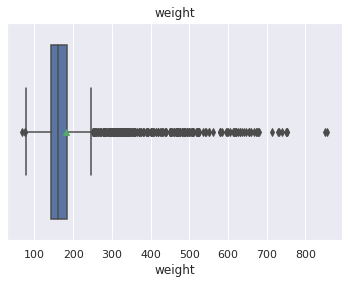

In [ ]:
# Displaying the histogram and boxplot
sns.histplot(data=df,x='weight',kde=True)
plt.title('weight')
plt.show()
sns.boxplot(data=df,x='weight',showmeans=True)
plt.title('weight')
plt.show()

Observation:

* Weight is right skewed
* There are outliers mostly on the upper side
* 50% of devises weight 160 grams

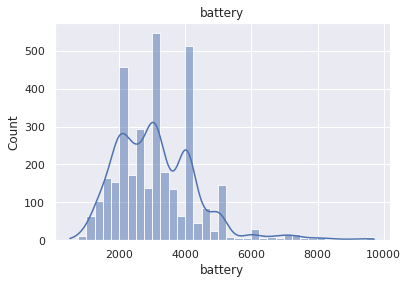

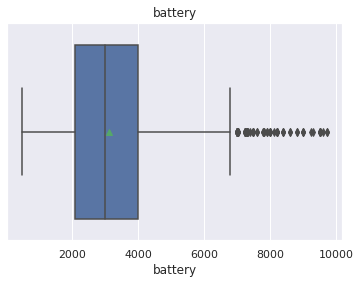

In [ ]:
# Displaying the histogram and boxplot
sns.histplot(data=df,x='battery',kde=True)
plt.title('battery')
plt.show()
sns.boxplot(data=df,x='battery',showmeans=True)
plt.title('battery')
plt.show()

Observation:

* Battery is right skewed
* There are outliers
* 75% of phones have battery capacity of 4,000 mAh or less

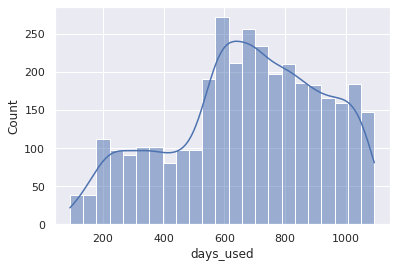

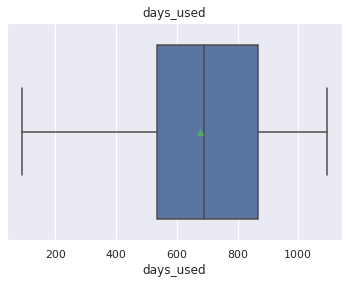

In [ ]:
# Displaying the histogram and boxplot
sns.histplot(data=df,x='days_used',kde=True)
plt.show()
plt.title('days_used')
sns.boxplot(data=df,x='days_used',showmeans=True)
plt.title('days_used')
plt.show()

Observation:

* Days used is left skewed
* There are no outliers
* 75% of devises are used in 868 days and less

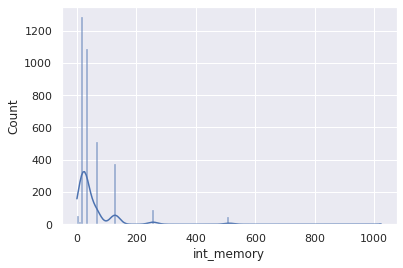

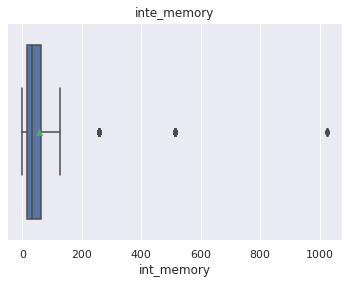

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='int_memory',kde=True)
plt.show()
plt.title('inte_memory')
sns.boxplot(data=df,x='int_memory',showmeans=True)
plt.title('inte_memory')
plt.show()

Observation:

* int memeory is right skewed
* There are outliers
* 75% of devises have 64 GB int_memory

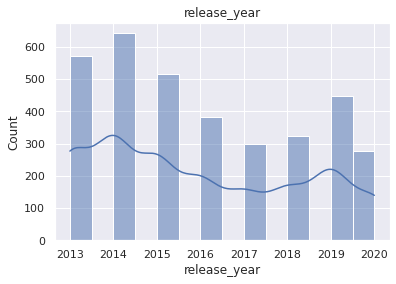

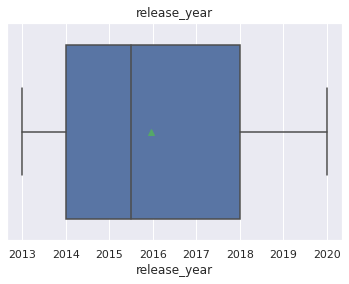

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='release_year',kde=True)
plt.title('release_year')
plt.show()
sns.boxplot(data=df,x='release_year',showmeans=True)
plt.title('release_year')
plt.show()



Observation:

* 75% of devises were released in 2018
* Release year is randomly distributed
* There are not outliers

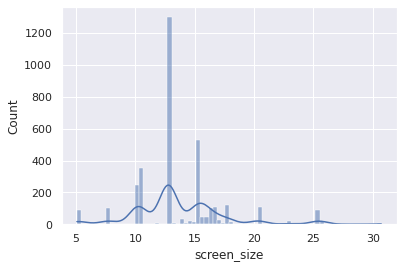

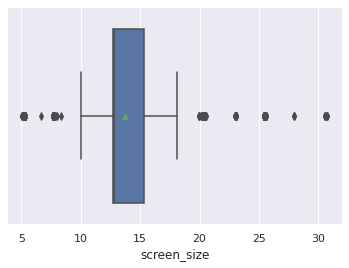

In [ ]:
sns.histplot(data=df,x='screen_size',kde=True)
plt.show()
sns.boxplot(data=df,x='screen_size',showmeans=True)
plt.show()

Observation:

* There are outliers
* The distribution is left skewed
* 50% of devises have around 13 cm screen size

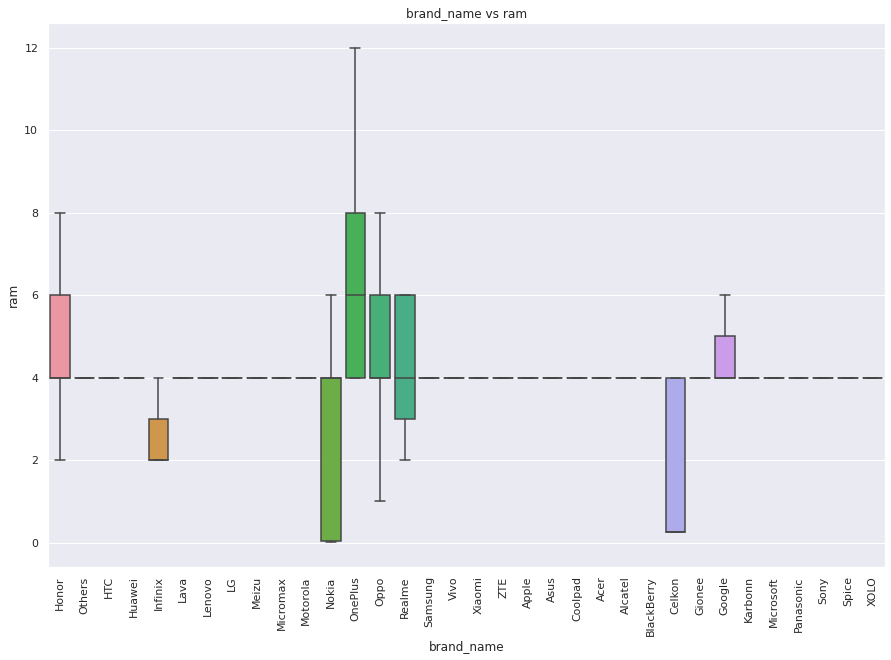

In [ ]:
# Displaying boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='brand_name',y='ram',showfliers=False)
plt.title('brand_name vs ram')
plt.xticks(Rotation=90)
plt.show()

Observation:

* OnePlus has the highest ram, followed by Acer and Panasonic


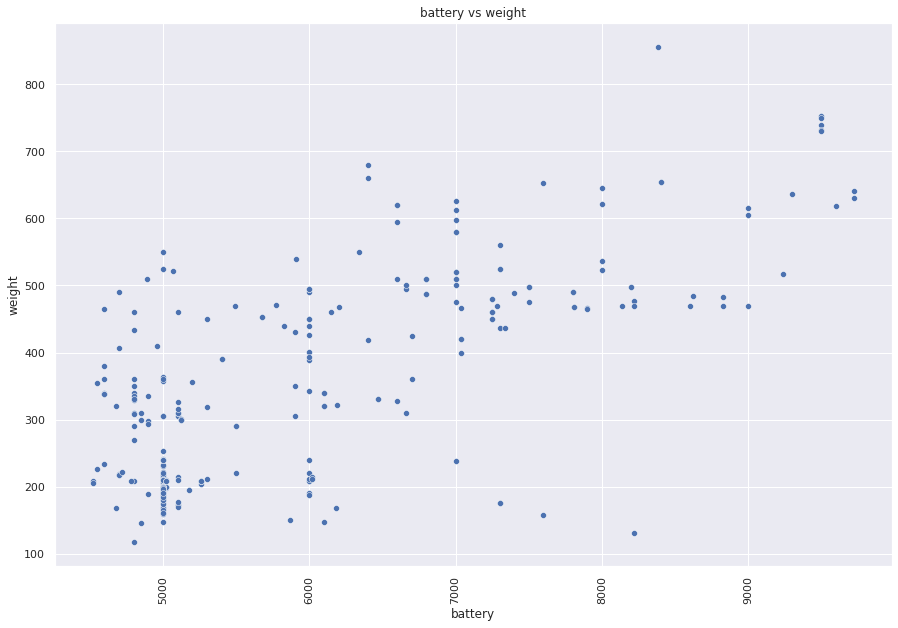

In [ ]:
#Creating a new DataFrame where battery capacity is greater than 4,500 mAh
df_battery_greater_than_4500mAh= df[df['battery']>4500]
# Displying the scatterplot
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_battery_greater_than_4500mAh,x='battery',y='weight')
plt.title('battery vs weight')
plt.xticks(Rotation=90)
plt.show()

Observation:

* It can be observed that apart of few points as the battery capacity increases the weight increases also

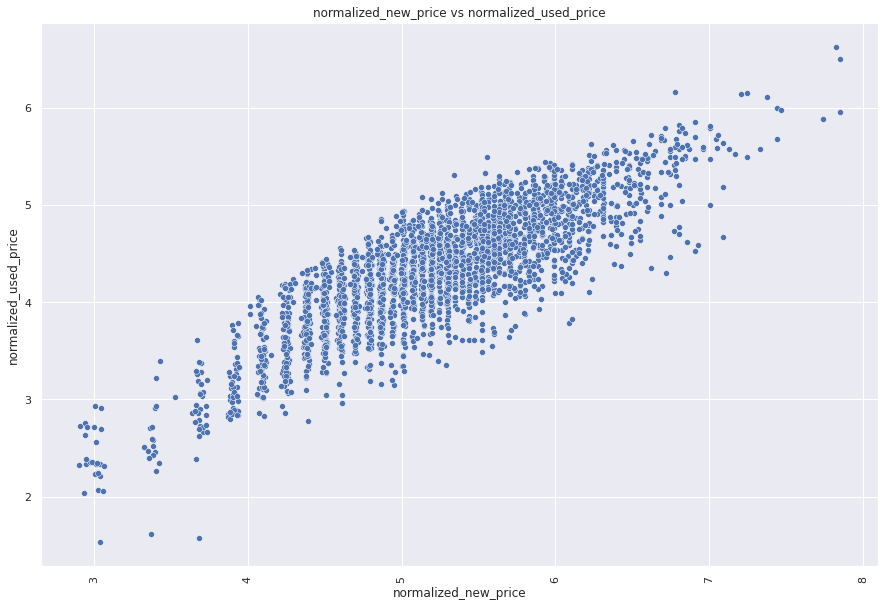

In [ ]:
# Displying the scatterplot
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x='normalized_new_price',y='normalized_used_price')
plt.title('normalized_new_price vs normalized_used_price')
plt.xticks(Rotation=90)
plt.show()

Observation:

* It can be observed that as the normalized new price increases the normalized used price increases too

In [ ]:
# Creating a new DataFrame where screen size is greater than or equal 15 cm(6 inches)
df_screensize_greater16= df.loc[df['screen_size']>15]
print ('Number of phones that have screen size larger than 15: ',df_screensize_greater16.shape[0])

Number of phones that have screen size larger than 15:  1259


Observation:

* There are 1,259 phones that have screen size greater than 6 inches

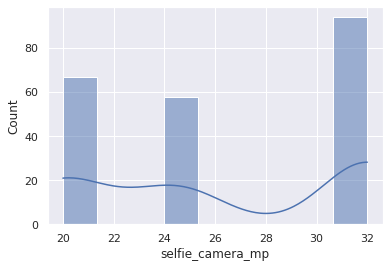

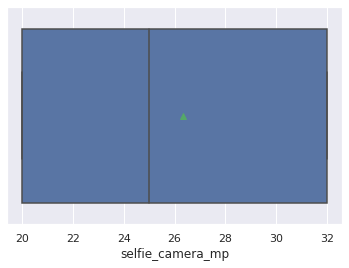

In [ ]:
# Creating a new DataFrame where selfie_camera_mp is  greater than 18 mp
df_than_8MP=df.loc[df['selfie_camera_mp']>18]
# Displaying histogram and boxplot
sns.histplot(data=df_than_8MP,x='selfie_camera_mp',kde=True)
plt.show()
sns.boxplot(data=df_than_8MP,x='selfie_camera_mp',showmeans=True)
plt.show()

Observation:

* The distribution of devices offering greater than 8MP selfie cameras across brands is random

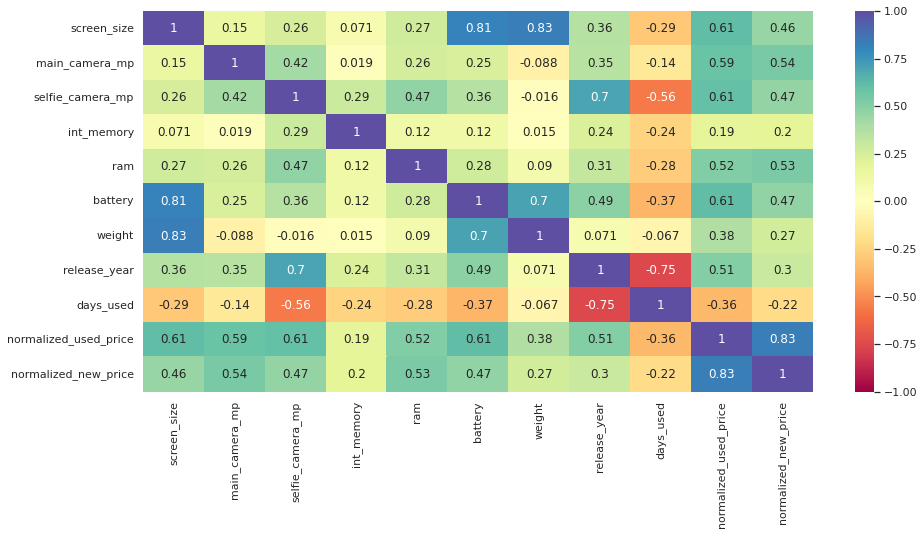

In [ ]:
# Heatmap to check the correlation between numerical data
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()


Observation:

* The highly correlated attribute to normilized used price are normalized new price with 83% followed by battery , screen size and selfie camera mp with 61% each
* Released year is also negatively correlated to days used with 75%
* Battery and weight are positively correlated to screen size with 81% and 83% respectively


In [ ]:
# Average normalized used price per brand name
df.groupby(['brand_name'])['normalized_used_price'].median().sort_values(ascending=False).reset_index()


,brand_name,normalized_used_price
0,OnePlus,5.166
1,Apple,5.012
2,Google,4.870
3,Vivo,4.809
4,Oppo,4.776
5,Xiaomi,4.693
6,Huawei,4.690
7,Honor,4.683
8,Realme,4.664
9,Meizu,4.634


Observatio:

* On average OnePlus is the most expensive used phone with 5.166 as normilized price, followed by Apple and Google


In [ ]:
# Average normalized new price per brand name
df.groupby(['brand_name'])['normalized_new_price'].median().sort_values(ascending=False).reset_index()

,brand_name,normalized_new_price
0,OnePlus,6.311
1,Apple,6.309
2,Google,6.181
3,Oppo,5.673
4,Vivo,5.634
5,Sony,5.526
6,Samsung,5.517
7,Huawei,5.515
8,HTC,5.515
9,Asus,5.403


Observatio:

* On average OnePlus is the most expensive new phone with 6.311 as normilized price, followed by Apple and Google

In [ ]:
# Calculating the average of "ram" per "os"
df.groupby(['os'])['ram'].median().sort_values(ascending=False).reset_index()

,os,ram
0,Android,4.000
1,Windows,4.000
2,iOS,4.000
3,Others,0.250


Observation:

* Android,Windows and iOS have the highest ram

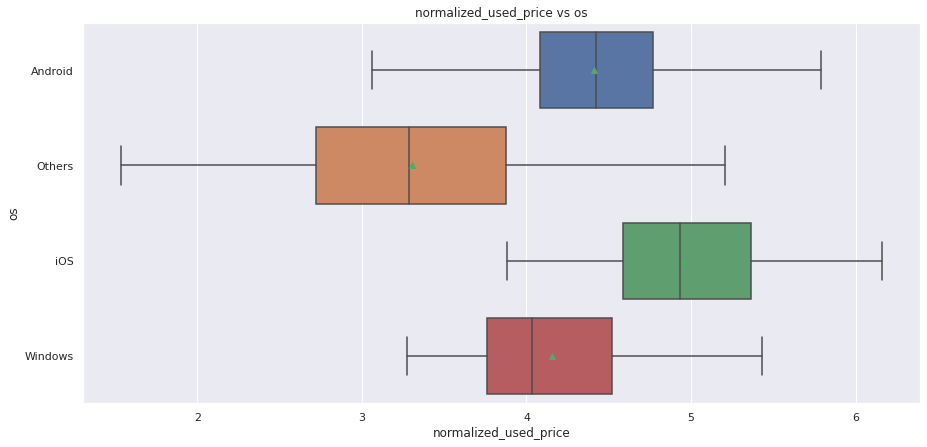

In [ ]:
# Displying the boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='normalized_used_price',y='os',showmeans=True,showfliers=False)
plt.title('normalized_used_price vs os')
plt.show()

Observation:

* On average phones with ios as operating system are the most expensive used phone, followed by Android and Window

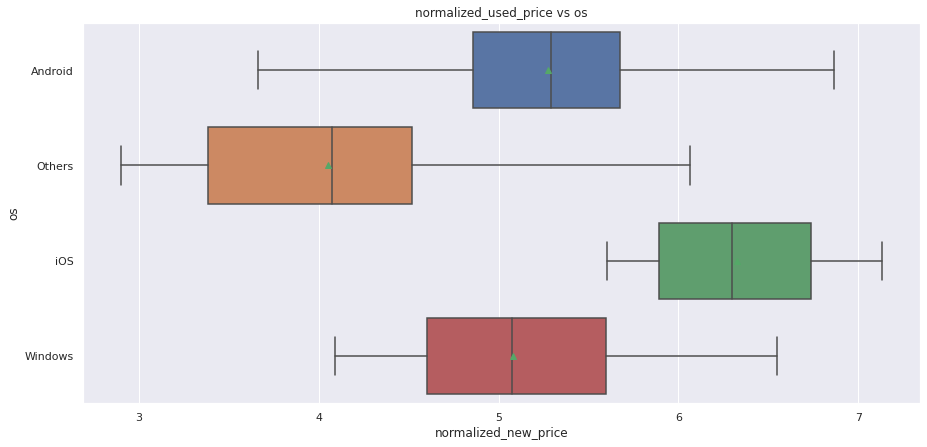

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='normalized_new_price',y='os',showmeans=True,showfliers=False)
plt.title('normalized_used_price vs os')
plt.show()

Observation:

* On average phones with ios as operating system are the most expensive new phone, followed by Android and Window

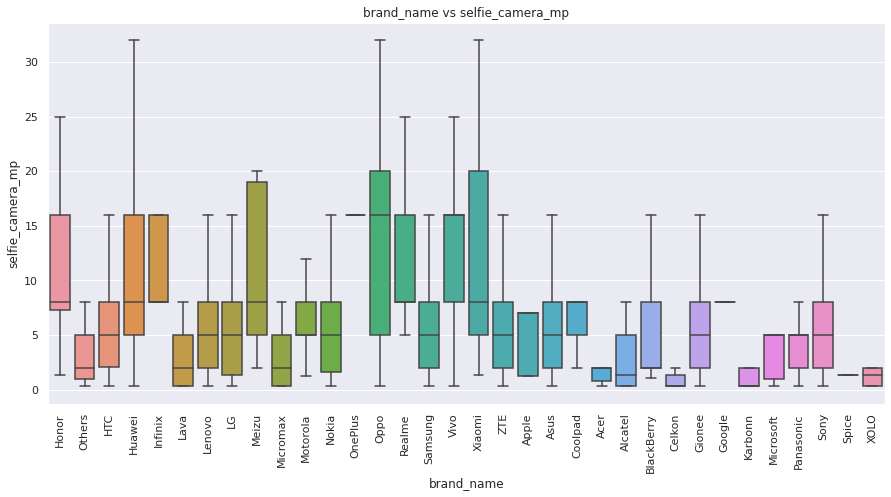

In [ ]:
# Displaying the boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='brand_name',y='selfie_camera_mp',showfliers=False)
plt.xticks(rotation=90)
plt.title('brand_name vs selfie_camera_mp')
plt.show()

Observation:

* Oppo,OnePlus and Vivo has selfie camera with the highest megapixel

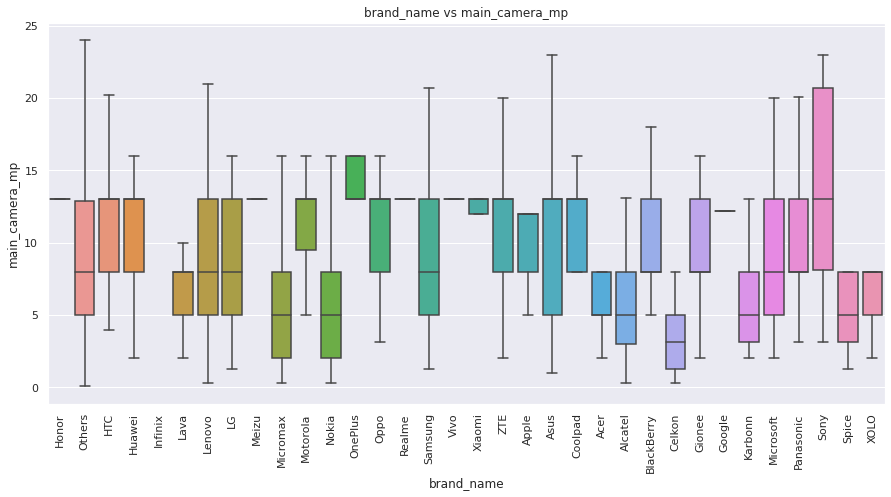

In [ ]:
# Displaying the boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='brand_name',y='main_camera_mp',showfliers=False)
plt.xticks(rotation=90)
plt.title('brand_name vs main_camera_mp')
plt.show()

Observation:

* 13 different brands have main camera with the highest megapixel (13mp)

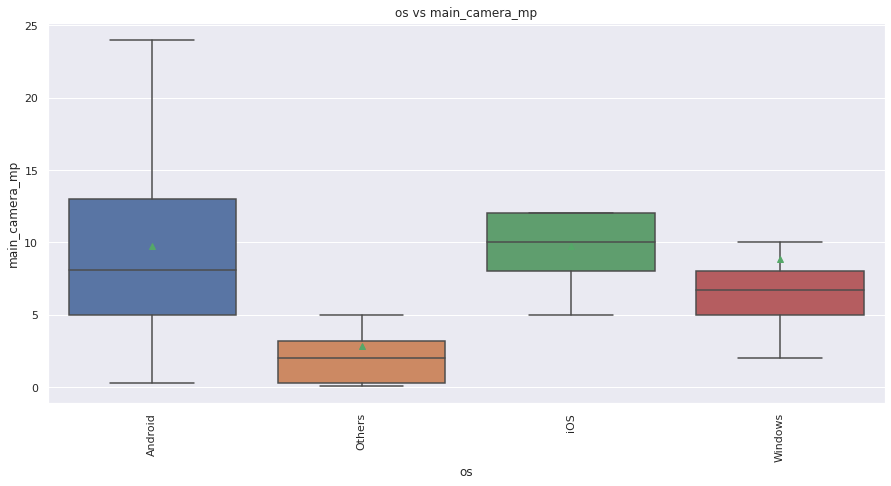

In [ ]:
# Displaying the boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='os',y='main_camera_mp',showfliers=False,showmeans=True)
plt.xticks(rotation=90)
plt.title('os vs main_camera_mp')
plt.show()

Observation:

* iOS has the highest megapixel on the main camera ,followed by Android and Windows

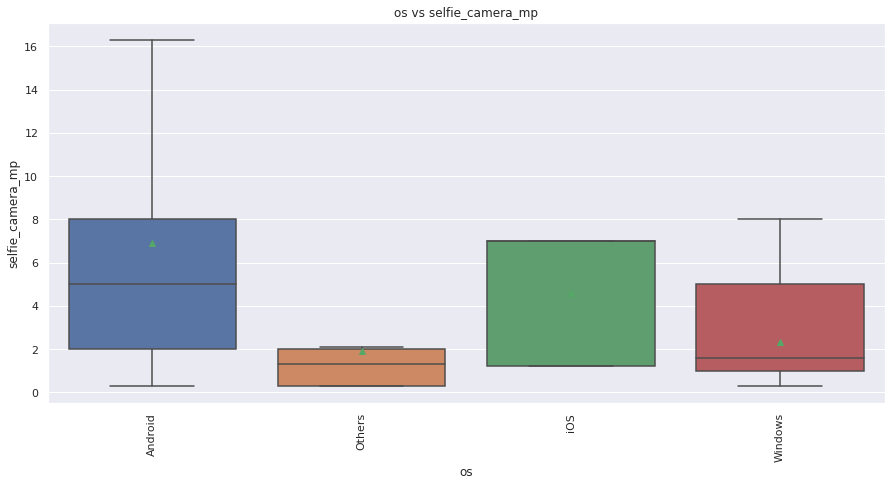

In [ ]:
# Displaying the boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='os',y='selfie_camera_mp',showfliers=False,showmeans=True)
plt.xticks(rotation=90)
plt.title('os vs selfie_camera_mp')
plt.show()

Observation:

* iOS has the highest megapixel on the selfie camera ,followed by Android and Windows

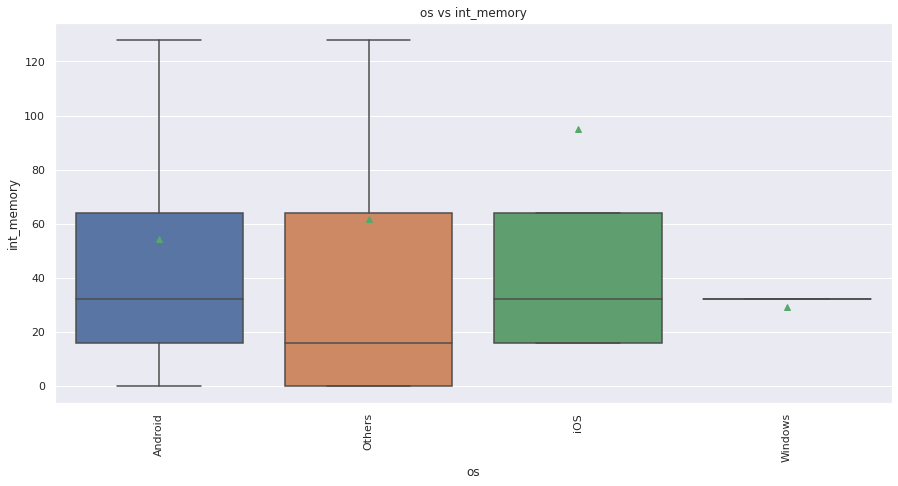

In [ ]:
# Displaying the boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='os',y='int_memory',showfliers=False,showmeans=True)
plt.xticks(rotation=90)
plt.title('os vs int_memory')
plt.show()

Observation: 

* Android,Windows and iOS have the highest internal memory

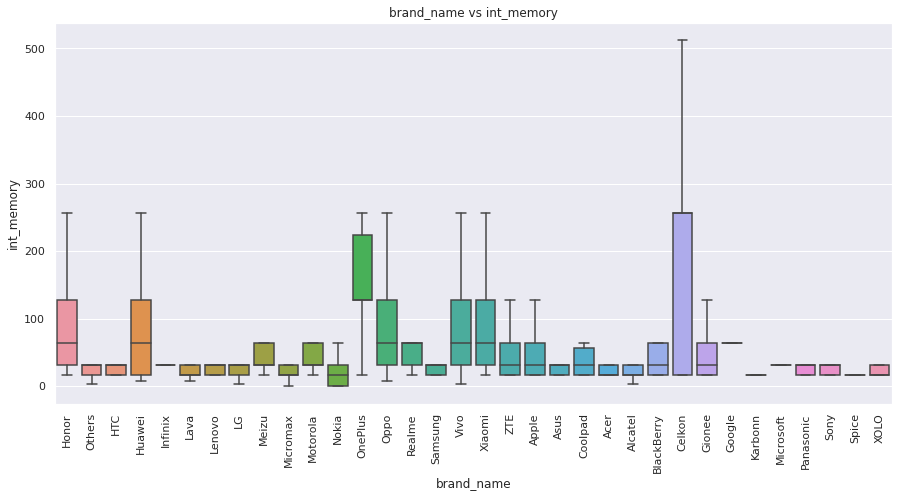

In [ ]:
# Displaying the boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='brand_name',y='int_memory',showfliers=False)
plt.xticks(rotation=90)
plt.title('brand_name vs int_memory')
plt.show()

Observation: 

* Celkon has highest internal memory followed by OnePlus and Xiaomi

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###Missing value treatment

In [ ]:
df1=df.copy()

In [ ]:
# selecting the attributes where missing value is greater than 0
pd.DataFrame({'Count':df1.isnull().sum()[df1.isnull().sum()>0],'Percentage':(df1.isnull().sum()[df1.isnull().sum()>0]/df1.shape[0])*100})

,Count,Percentage
main_camera_mp,179,5.182
selfie_camera_mp,41,1.187
int_memory,4,0.116
ram,4,0.116
battery,6,0.174
weight,7,0.203


Observation:

* Main camera mp column has the highest percentage of missing values
* Selfie camera mp has the second highest percentage of missing values
* Int_memory and ram have equal percentage of missing values
* Battery and weight have relatively high percentage of missing values

In [ ]:
# imputing missing values
cols_impute=[ 
      'main_camera_mp', 
      'selfie_camera_mp',
      'int_memory',
      'ram',
      'battery',
      'weight'
]

for i in cols_impute:
  df1[i]=df1[i].fillna(df1.groupby(['brand_name','os'])[i].transform('median'))

In [ ]:
# Checking if all missing values were imputed
pd.DataFrame({'Count':df1.isnull().sum()[df1.isnull().sum()>0],'Percentage':(df1.isnull().sum()[df1.isnull().sum()>0]/df1.shape[0])*100})

,Count,Percentage
main_camera_mp,10,0.290
selfie_camera_mp,39,1.129


In [ ]:
# imputing missing values in main camera mp column
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(value = df1.groupby(['os'])['main_camera_mp'].transform('median'))

# imputing missing values in selfie camera mp column
df1['selfie_camera_mp'] = df1['selfie_camera_mp'].fillna(value = df1.groupby(['os'])['selfie_camera_mp'].transform('median'))

In [ ]:
# Checking again if all missing were imputed
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

###Feature engineering

In [ ]:
# Creating a new feature " years_since_release "
df1["years_since_release"] = 2022 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)


In [ ]:
# Checking if the new feature "years_since_release" was properly created
df1.sample(2)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
2036,Nokia,Android,15.700,yes,no,8.000,20.000,64.000,4.000,3500.000,180.000,485,4.609,5.989,4
2059,Nokia,Others,5.180,no,no,0.300,1.300,0.060,0.020,1200.000,82.600,1023,2.765,3.658,6


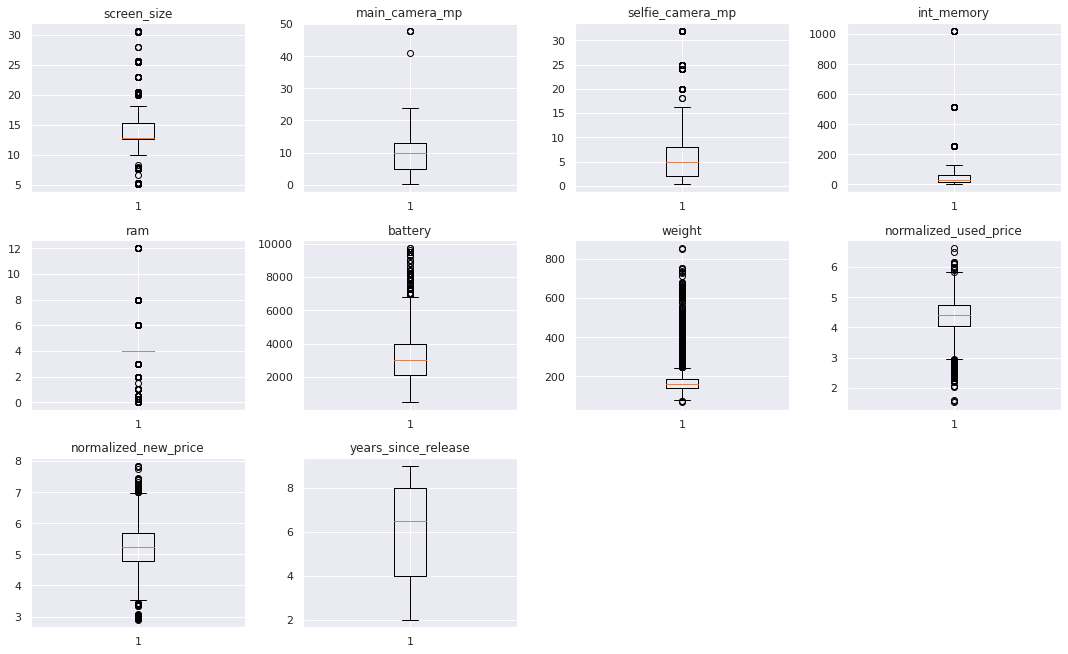

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery','weight',
                   'normalized_used_price','normalized_new_price','years_since_release']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df1[numeric_columns].quantile(0.25)
Q3 = df1[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percentage of outliers in each column
((df1[numeric_columns] < lower_whisker) | (df1[numeric_columns] > upper_whisker)).sum()/df1.shape[0]*100

screen_size             13.028
main_camera_mp           0.145
selfie_camera_mp         6.398
int_memory               3.995
ram                     18.500
battery                  2.229
weight                  10.654
normalized_used_price    2.461
normalized_new_price     1.911
years_since_release      0.000
dtype: float64

**Let's analyze each column to see if the values in them can be considered as outliers or not.**
  
  
 * **screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery,weight** - The values which are being represented as outliers in the above boxplot may seem unrealistic in some cases but as per my research there are phones and tablets in the market that have those values hence shall be considered as genuine values and not outliers

  
 
 * **normalized_used_price,normalized_new_price and normalized_depreciated_value** - The selling price of devise depends upon various factors (for example brand of the devise,....) and the prices can change from time to time. Hence, the selling price of devise can be considered as genuine values and not outliers. 


## EDA

- It is a good idea to explore the data once again after manipulating it.

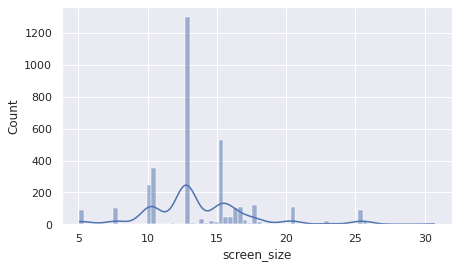

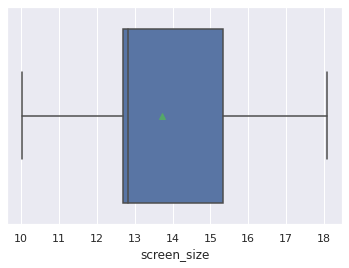

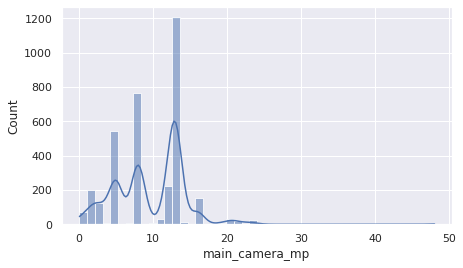

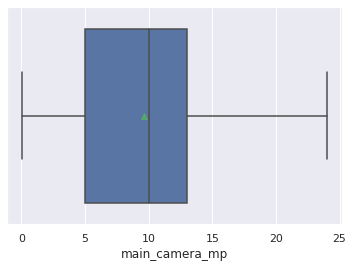

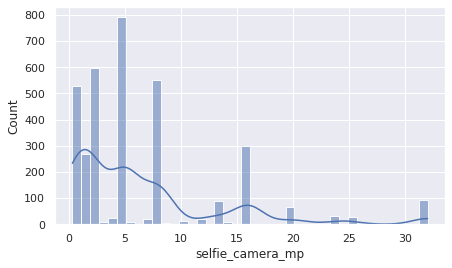

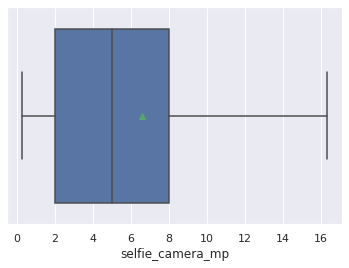

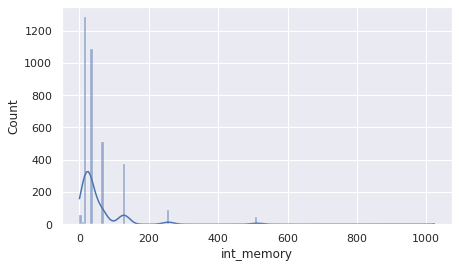

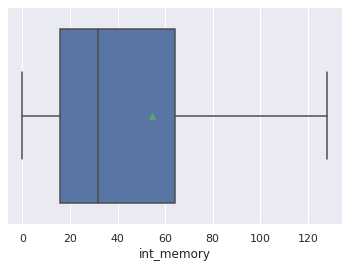

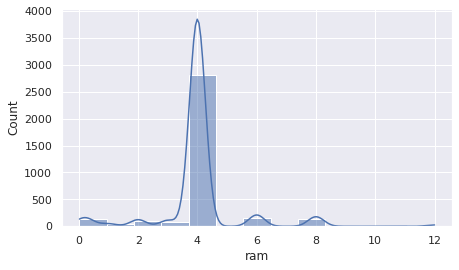

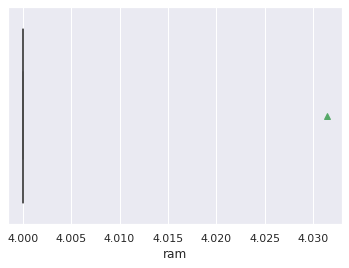

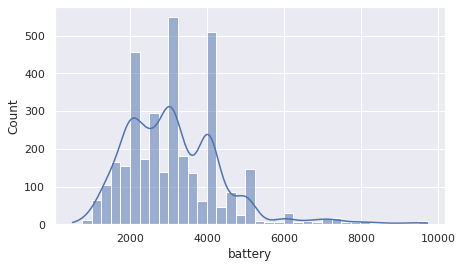

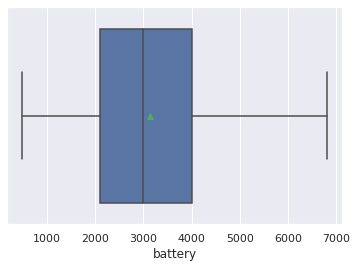

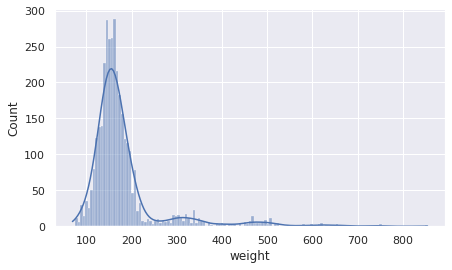

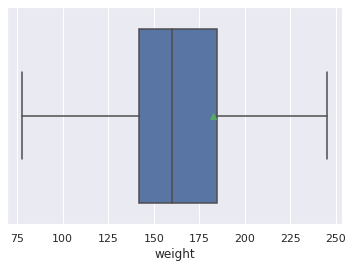

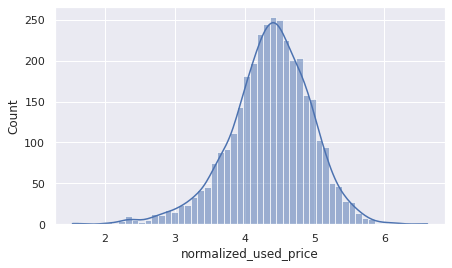

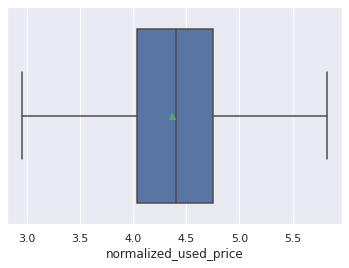

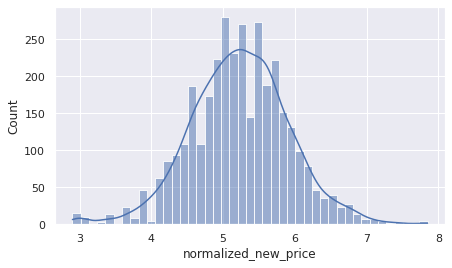

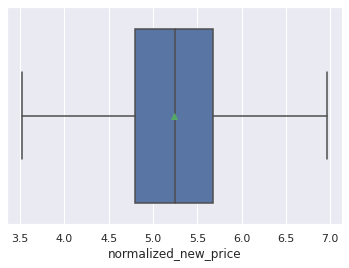

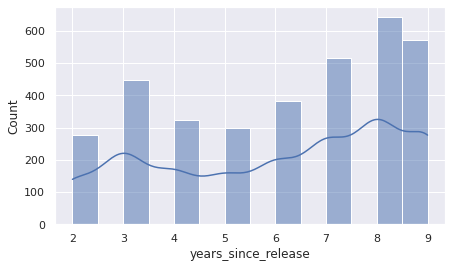

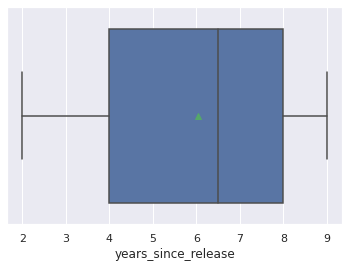

In [ ]:

for i in numeric_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df1, x=i,kde=True)
    plt.show()
    sns.boxplot(data=df1,x=i,showmeans=True,showfliers=False)
    plt.show()

Observation:

* It can be observed that the distributions of columns we treated the missing values did not significantly change which is a good sign.

In [ ]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.000,NaN,NaN,NaN,13.713,3.805,5.080,12.700,12.830,15.340,30.710
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.000,NaN,NaN,NaN,9.635,4.751,0.080,5.000,10.000,13.000,48.000
selfie_camera_mp,3454.000,NaN,NaN,NaN,6.570,6.956,0.300,2.000,5.000,8.000,32.000
int_memory,3454.000,NaN,NaN,NaN,54.510,84.943,0.010,16.000,32.000,64.000,1024.000
ram,3454.000,NaN,NaN,NaN,4.031,1.371,0.020,4.000,4.000,4.000,12.000
battery,3454.000,NaN,NaN,NaN,3132.114,1299.431,500.000,2100.000,3000.000,4000.000,9720.000


Observation:

* We have treated all missing values including those having values "0"

## Model Building - Linear Regression

In [ ]:
# splitting the data into the dependent and independent variables
X = df1.drop("normalized_used_price", axis=1)
y = df1["normalized_used_price"]

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.500,13.000,5.000,64.000,3.000,3020.000,146.000,127,4.715,2,...,0,0,0,0,0,0,0,0,1,0
1,17.300,13.000,16.000,128.000,8.000,4300.000,213.000,325,5.519,2,...,0,0,0,0,0,0,0,0,1,1
2,16.690,13.000,8.000,128.000,8.000,4200.000,213.000,162,5.885,2,...,0,0,0,0,0,0,0,0,1,1
3,25.500,13.000,8.000,64.000,6.000,7250.000,480.000,345,5.631,2,...,0,0,0,0,0,0,0,0,1,1
4,15.320,13.000,8.000,64.000,3.000,5000.000,185.000,293,4.948,2,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# this adds the constant term to the dataset
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=1
)

In [ ]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     247.6
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:11:27   Log-Likelihood:                 108.77
No. Observations:                   2245   AIC:                            -119.5
Df Residuals:                       2196   BIC:                             160.6
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231,0.181,0.844,0.841,4.344


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237,0.184,0.843,0.836,4.483


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

### TEST FOR MULTICOLLINEARITY

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,234.532
1,screen_size,7.488
2,main_camera_mp,2.270
3,selfie_camera_mp,2.819
4,int_memory,1.357
5,ram,2.301
6,battery,4.068
7,weight,6.273
8,days_used,2.648
9,normalized_new_price,3.087


Observation:

* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.837,0.236
1,screen_size,0.837,0.236


In [ ]:
col_to_drop = "weight"
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,214.898
1,screen_size,3.566
2,main_camera_mp,2.180
3,selfie_camera_mp,2.792
4,int_memory,1.357
5,ram,2.299
6,battery,3.662
7,days_used,2.636
8,normalized_new_price,3.083
9,years_since_release,4.709


In [ ]:
olsmodel1 = sm.OLS(y_train, X_train1).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     246.6
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:11:29   Log-Likelihood:                 84.657
No. Observations:                   2245   AIC:                            -73.31
Df Residuals:                       2197   BIC:                             201.1
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel1, X_train1, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233,0.182,0.841,0.837,4.382


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel1, X_test1, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239,0.186,0.840,0.833,4.525


### Dealing with high p-value variables

In [ ]:
# initial list of columns
predictors = X_train1.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', 'brand_name_Samsung', 'brand_name_Xiaomi', '4g_yes']


In [ ]:
X_train2 = X_train1[selected_features]
X_test2 = X_test1[selected_features]

In [ ]:
olsmodel2 = sm.OLS(y_train, X_train2).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1158.
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:11:29   Log-Likelihood:                 68.377
No. Observations:                   2245   AIC:                            -114.8
Df Residuals:                       2234   BIC:                            -51.87
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, X_train2, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235,0.184,0.838,0.838,4.412


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, X_test2, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238,0.185,0.842,0.841,4.475


### TEST FOR LINEARITY AND INDEPENDENCE

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1796,4.463,4.366,0.097
1903,2.383,2.708,-0.324
2876,4.749,4.756,-0.007
911,4.279,4.413,-0.134
191,4.977,4.882,0.096


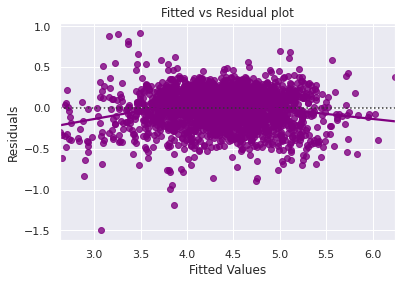

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [ ]:
X_train2.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram',
       'days_used', 'normalized_new_price', 'years_since_release',
       'brand_name_Samsung', 'brand_name_Xiaomi', '4g_yes'],
      dtype='object')

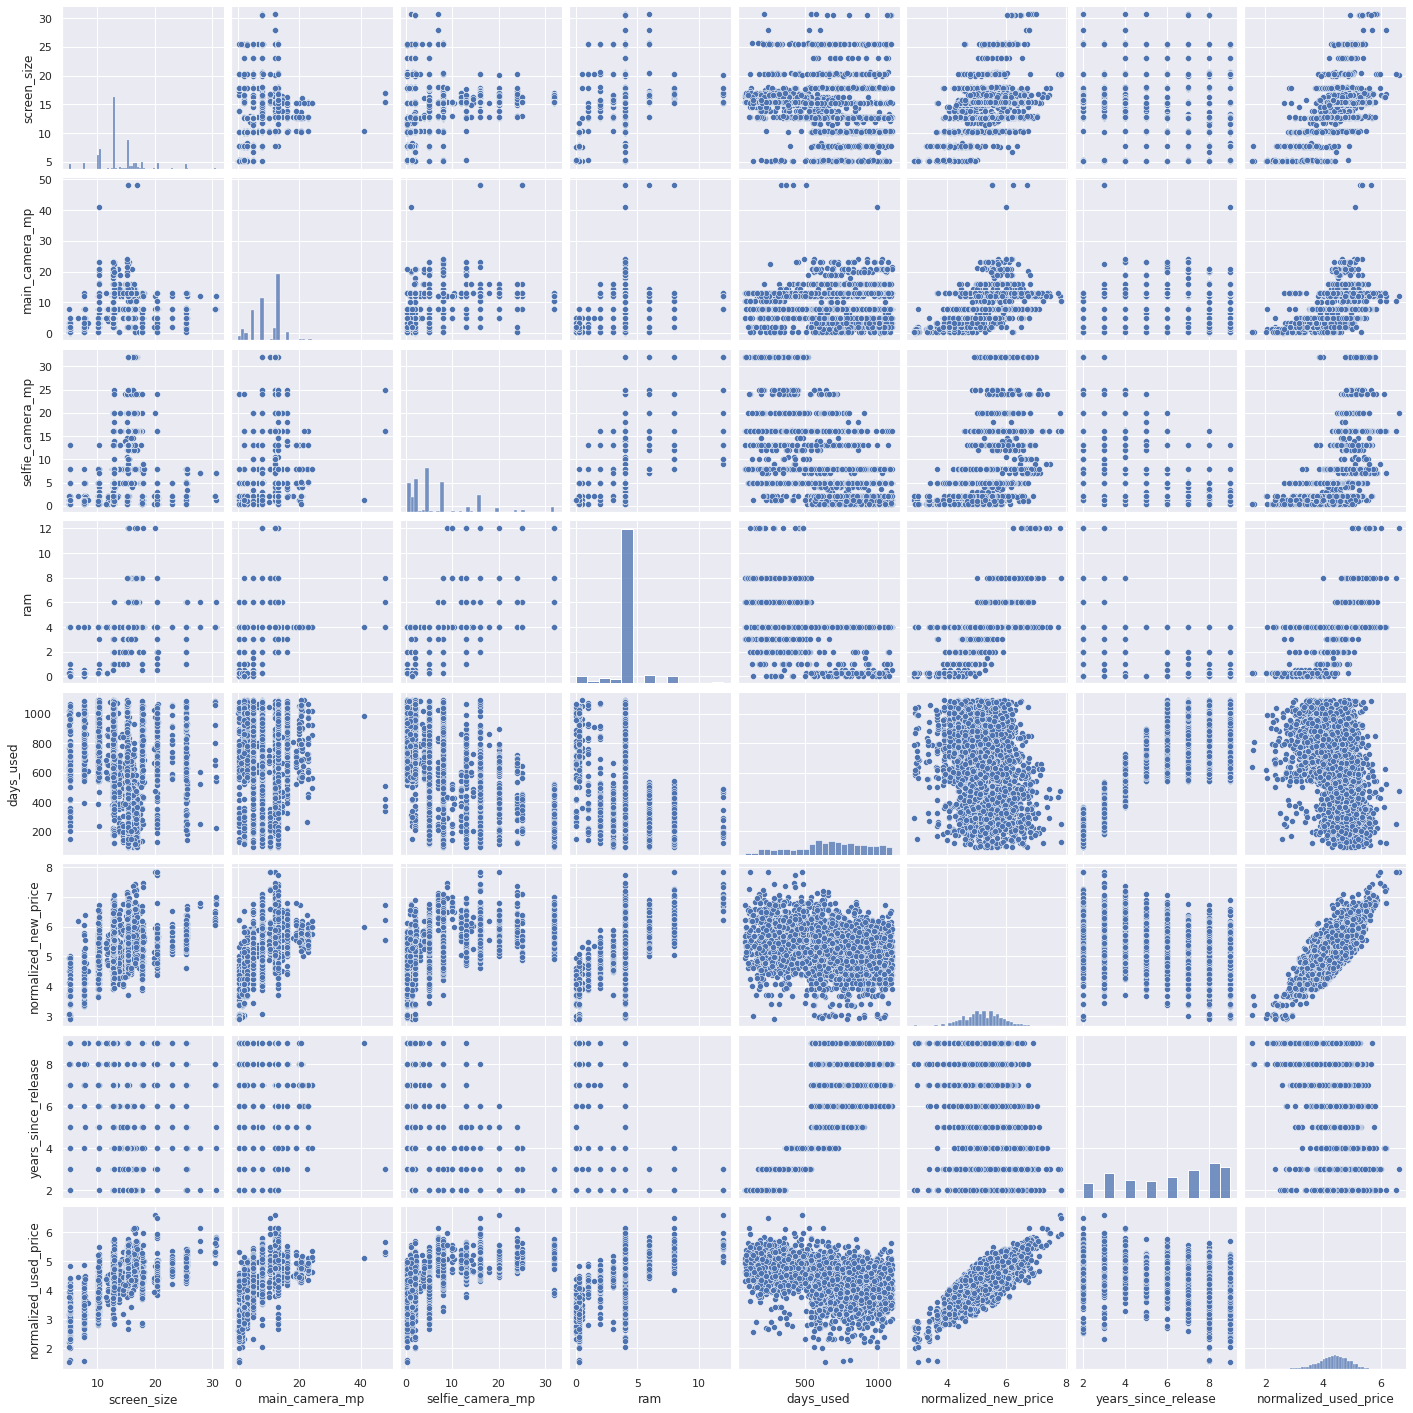

In [ ]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(df1[["screen_size", "main_camera_mp", "selfie_camera_mp", "ram", "days_used","normalized_new_price",
                  "years_since_release","normalized_used_price"]])
plt.show()

In [ ]:
# Transforming "main_camera_mp_sq" and "selfie_camera_mp_sq" in the training data using np.square
X_train2["main_camera_mp_sq"] = np.square(X_train2["main_camera_mp"])
X_train2["selfie_camera_mp_sq"] = np.square(X_train2["selfie_camera_mp"])

# Transforming "main_camera_mp_sq" and "selfie_camera_mp_sq" in the testing data using np.square
X_test2["main_camera_mp_sq"] = np.square(X_test2["main_camera_mp"])
X_test2["selfie_camera_mp_sq"] = np.square(X_test2["selfie_camera_mp"])

In [ ]:
# Training the model
olsmodel3 = sm.OLS(y_train, X_train2).fit()
print(olsmodel3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     975.8
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:11:56   Log-Likelihood:                 79.571
No. Observations:                   2245   AIC:                            -133.1
Df Residuals:                       2232   BIC:                            -58.83
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1796,4.463,4.381,0.082
1903,2.383,2.696,-0.313
2876,4.749,4.759,-0.010
911,4.279,4.411,-0.132
191,4.977,4.895,0.082


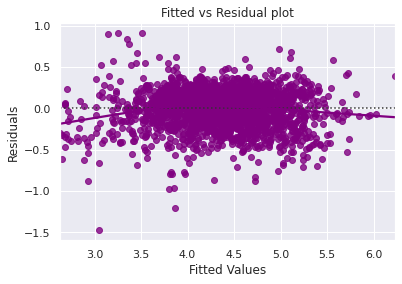

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observation:

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied**.

In [ ]:
checking_vif(X_train2)

,feature,VIF
0,const,97.710
1,screen_size,1.447
2,main_camera_mp,7.077
3,selfie_camera_mp,21.401
4,ram,1.578
5,days_used,2.526
6,normalized_new_price,2.534
7,years_since_release,4.931
8,brand_name_Samsung,1.065
9,brand_name_Xiaomi,1.042


In [ ]:
col_list = ["selfie_camera_mp_sq", "selfie_camera_mp"]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,selfie_camera_mp_sq,0.839,0.235
1,selfie_camera_mp,0.828,0.242


In [ ]:
col_to_drop = "selfie_camera_mp_sq"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  selfie_camera_mp_sq


,feature,VIF
0,const,96.085
1,screen_size,1.440
2,main_camera_mp,6.518
3,selfie_camera_mp,2.464
4,ram,1.550
5,days_used,2.518
6,normalized_new_price,2.444
7,years_since_release,4.270
8,brand_name_Samsung,1.059
9,brand_name_Xiaomi,1.041


In [ ]:
col_list = ["main_camera_mp"]

res = treating_multicollinearity(X_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,main_camera_mp,0.826,0.244


Observation:

* Main camera mp seems to be important so we keep it

In [ ]:
olsmodel4 = sm.OLS(y_train, X_train3).fit()
print(olsmodel4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1061.
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:11:57   Log-Likelihood:                 76.168
No. Observations:                   2245   AIC:                            -128.3
Df Residuals:                       2233   BIC:                            -59.74
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
X_train4=X_train3.drop(['4g_yes','days_used'],axis=1) 
X_test4=X_test3.drop(['4g_yes','days_used'],axis=1) 

In [ ]:
olsmodel5 = sm.OLS(y_train, X_train4).fit()
print(olsmodel5.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1293.
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:11:57   Log-Likelihood:                 72.214
No. Observations:                   2245   AIC:                            -124.4
Df Residuals:                       2235   BIC:                            -67.26
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel5, X_train4, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234,0.184,0.839,0.838,4.407


In [ ]:
# checking model performance on train set (seen 70% data)
print("Test Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel5, X_test4, y_test)
olsmodel_train_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238,0.185,0.842,0.841,4.481


### TEST FOR NORMALITY


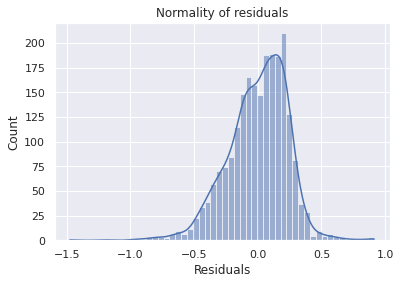

In [ ]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

Observation:

* The residual terms are almost normally distributed.

Lets also use the QQ plot of residuals to check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

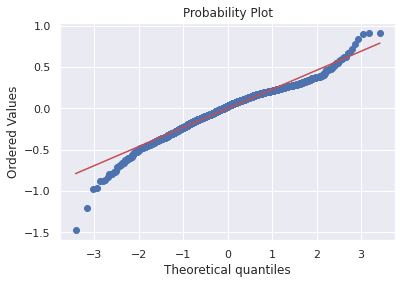

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Observation:

* Most of the points are lying on the straight line in QQ plot 

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9720473289489746, pvalue=1.6056646823924038e-20)

Observation:

* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* The residuals are not normal. However, as an approximation, we assume the distribution is normal
* **So, the assumption is satisfied**. 

### TEST FOR HOMOSCEDASTICITY

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.0675577331988524), ('p-value', 0.13809202863194278)]

Observation:

* Since p-value > 0.05 we can say that the residuals are homoscedastic.
* **So, the assumption is satisfied**.



## Final Model

In [ ]:
X_train_final=X_train4.copy()
X_test_final=X_test4.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, X_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1293.
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:11:58   Log-Likelihood:                 72.214
No. Observations:                   2245   AIC:                            -124.4
Df Residuals:                       2235   BIC:                            -67.26
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel_final, X_train_final, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234,0.184,0.839,0.838,4.407


In [ ]:
# checking model performance on train set (seen 70% data)
print("Test Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel_final, X_test_final, y_test)
olsmodel_train_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238,0.185,0.842,0.841,4.481


Observation:

* The model is able to explain ~83.9% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.481% of normalized used price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

In [ ]:
# Let us write the equation of linear regression
Equation = "Normalized used price ="
print(Equation, end=" ")
for i in range(len(X_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(X_train_final.columns) - 1:
        print(
            "(",
            olsmodel_final.params[i],
            ")*(",
            X_train_final.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", olsmodel_final.params[i], ")*(", X_train_final.columns[i], ")")

Normalized used price = 1.2519633149269844 + ( 0.04300296793522223 )*( screen_size ) + ( 0.029012643643427267 )*( main_camera_mp ) + ( 0.012785982289595287 )*( selfie_camera_mp ) + ( 0.0146276895832795 )*( ram ) + ( 0.42749450562097113 )*( normalized_new_price ) + ( -0.015580258359880313 )*( years_since_release ) + ( -0.029027244718375506 )*( brand_name_Samsung ) + ( 0.07491738340208359 )*( brand_name_Xiaomi ) + ( -0.0003639765700165129 )*( main_camera_mp_sq )


## Actionable Insights and Recommendations 

* RCell should put more effort i the sell of phones that operate with Android operating system because:

1. They have the highest "Ram" hence the responsness of the phone is much more faster.
2. They have good megapixel on both main and selfie cameras , in today world where everyone wants to take pictures and videos, Android can make the difference with their good quality of pictures and videos.
3. They have the highest internal memory

* Rcell should also increase visibility of "OnePlus" phone as it has everything needed to be a good phone; high "ram", high megapixel on both main and seflie cameras and good "screen size" and good internal memory

* Since normalized used price increases as normalized new price increase ,Rcell should do more advertisment on their expensive devices, hence get good returns

* The model is able to explain ~83.9% of the variation in the data and within  4.481% of the normalized used price on the test data, which indicates that the model is good for prediction as well as inference purposes

*  If the normalized new price of a device increases by one unit, then the normilazed used price increases by 0.4275 units, all other variables held constant

* If the brand of the devise is Xiaomi,then the normalized used price increases by 0.0749 units, all other variables held constant

* If the screen size of the devise increases by one unit, then the normalized used price increases by 0.0430 units, all other variables held constant

* If migapixel of the main camera of the devise increases by one unit, then the normalized used price increases by 0.0290 units, all other variables held constant

* If the years since released of the devise increases by one unit, then the normalized used price decreases by 0.0156 units, all other variables held constant

* If the brand of the devise is Samsung,then the normalized used price decreases by 0.0290  units, all other variables held constant

* If the ram of the devise increases by one unit, then the normalized used price increases by 0.0146 units, all other variables held constant

* If migapixel of the selfie camera of the devise increases by one unit, then the normalised used price increases by 0.0128  units, all other variables held constant 

* Since normalized price increases when the devise brand is Xiaomi ,Rcell should increase its visibility and hence increase the sale of that brand

* Since the normalized used price increases as the megapixel of the main camera and selfie camera increases ,Rcell must sell devise with higher megapixel on main and selfie camera
  
* As normalized used price decreases with the increase of years since release of devises, Rcell should sell only devise with fewer years since release of the devise

* Since the normalized used price increases as the ram of the device increases ,Rcell must sell devicee with higher ram.

___